Goals:

* Find an orthogonal initialisation of a conv layer.
* Find eigen values of conv layers.
* 

(Pauls...) Ideas
* Could forget the wrapping around to give circulant matrix?!?
* Haar wavelet to form a basis (aka orthogonal ?)


Related (?)
* http://www.circulants.org/circ/circall.pdf
* https://github.com/MMesch/toeplitz_spectrum/blob/master/toeplitz_spectrum.ipynb

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [185]:
n = 9 #image width/depth
w = 3 #window
s = 1 #strides
m = int((n-w+1)/s) #steps
K = 1 #filters

In [186]:
def fillFilt(weights):
    filt = np.zeros((K,w*w+(w-1)*(n-w)))
    for k in range(K): #for each kernel
        for i in range(m): #for each row
            filt[k,n*i:w+n*i] = weights[k,w*i:w*(i+1)]
    return filt

In [187]:
def fillMat(filters):
    M = np.zeros((K*m*m,n*n))
    count = 0
    for k in range(K):#for each kernel
        for j in range(m):#for each vert
            for i in range(m): #for each horz
                M[count,j*n+i:j*n+w+n*2+i] = filt[k,:]
                count +=1
    return M

In [188]:
weights = np.random.standard_normal((K,w*w))
M = fillMat(fillFilt(weights))
u,s,v = np.linalg.svd(M)

<Container object of 49 artists>

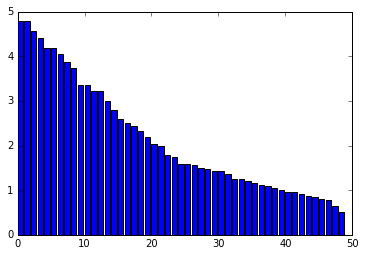

In [189]:
plt.bar([i for i in range(len(s))],s)

In [190]:
depth = 5
Layers = [fillMat(fillFilt(np.random.standard_normal((K,w*w)))) for i in range(depth)]

In [191]:
N = 100
x = np.random.random((n*n,N))
for i in range(depth):
    x = np.dot(Layers[i].T,x)

ValueError: shapes (81,49) and (81,100) not aligned: 49 (dim 1) != 81 (dim 0)

<Container object of 81 artists>

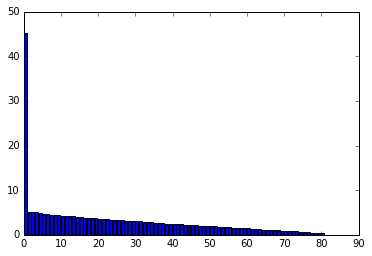

In [199]:
x = np.random.random((n*n,N))
u,s,v = np.linalg.svd(x)
plt.bar([i for i in range(len(s))],s)

<Container object of 49 artists>

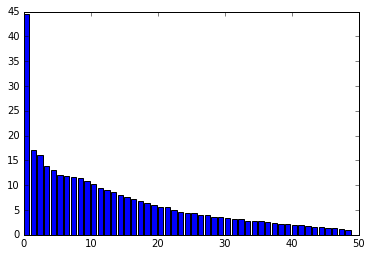

In [202]:
y = np.dot(Layers[0],x)
u,s,v = np.linalg.svd(y)
plt.bar([i for i in range(len(s))],s)

In [174]:
y.reshape((7,7))

ValueError: total size of new array must be unchanged

In [175]:
def zeroPad(image, p = None):
    return np.lib.pad(image,((p,p),(p,p)),'constant', constant_values=0)
    
zeroPad(x.reshape((9,9)),1).shape

ValueError: total size of new array must be unchanged